# Wine Quality Prediction

This datasets is related to red variants of the Portuguese *Vinho Verde* wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Loading Dataset

In [2]:
# Red wine data!
df1 = pd.read_csv("winequality-red.csv", sep=";")
df1["type"] = "red"

# White Wine Data!
df2 = pd.read_csv("winequality-white.csv", sep=";")
df2["type"] = "white"

In [3]:
df = pd.concat([df1, df2], axis=0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

## Observations
- All are numeric features.
- Null values are not present.

In [6]:
df.duplicated().sum()

1177

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


## Categorical Encoding

In [10]:
df['type'] = df['type'].apply(lambda x: 1 if x=="white" else 0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


## Analyzing Distributions

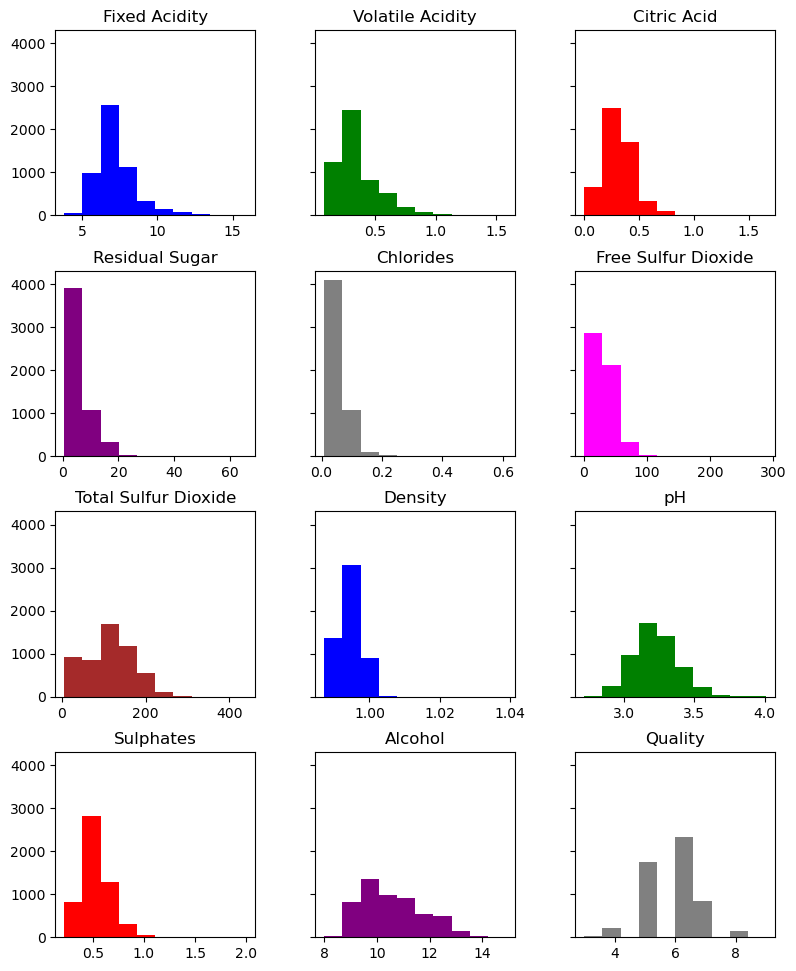

In [11]:
fig, axis = plt.subplots(4, 3, sharey=True)
plt.subplots_adjust(right=1.25, hspace=0.3, wspace=0.3, top=2)

axis[0, 0].hist(data=df, x="fixed acidity", color="blue")
axis[0, 0].set(title="Fixed Acidity")

axis[0, 1].hist(data=df, x="volatile acidity", color="green")
axis[0, 1].set(title="Volatile Acidity");

axis[0, 2].hist(data=df, x="citric acid", color="red")
axis[0, 2].set(title="Citric Acid")

axis[1, 0].hist(data=df, x="residual sugar", color="purple")
axis[1, 0].set(title="Residual Sugar");

axis[1, 1].hist(data=df, x="chlorides", color="grey")
axis[1, 1].set(title="Chlorides")

axis[1, 2].hist(data=df, x="free sulfur dioxide", color="magenta")
axis[1, 2].set(title='Free Sulfur Dioxide');

axis[2, 0].hist(data=df, x='total sulfur dioxide', color="brown")
axis[2, 0].set(title='Total Sulfur Dioxide')

axis[2, 1].hist(data=df, x="density", color="blue")
axis[2, 1].set(title="Density")

axis[2, 2].hist(data=df, x="pH", color="green")
axis[2, 2].set(title="pH")

axis[3, 0].hist(data=df, x="sulphates", color="red")
axis[3, 0].set(title='Sulphates');

axis[3, 1].hist(data=df, x='alcohol', color="purple")
axis[3, 1].set(title='Alcohol')

axis[3, 2].hist(data=df, x="quality", color="grey")
axis[3, 2].set(title="Quality");

## Observations
- `Acidities` have partially normal distributions.
- `Density`, `pH` are normally distributed.
- `Quality` contains values in (3-8) range.
- `Others` are not distributed normally i.e. some are skewed and some have staircase distributions.

## Outliers

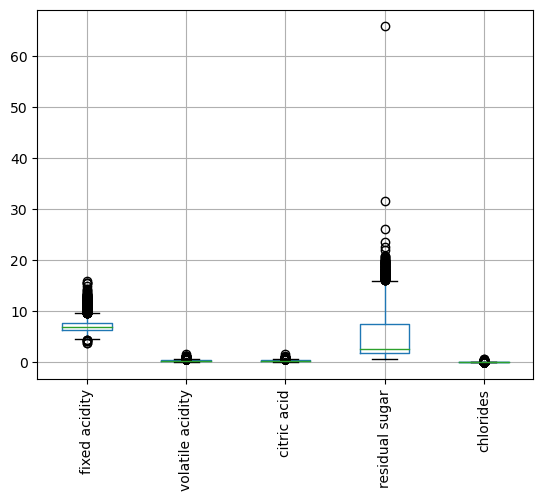

In [12]:
df.boxplot(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'])
plt.xticks(rotation=90)
plt.show()

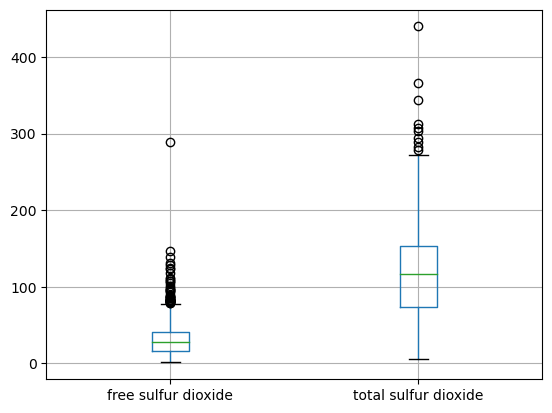

In [13]:
df.boxplot(['free sulfur dioxide', 'total sulfur dioxide'])
plt.show()

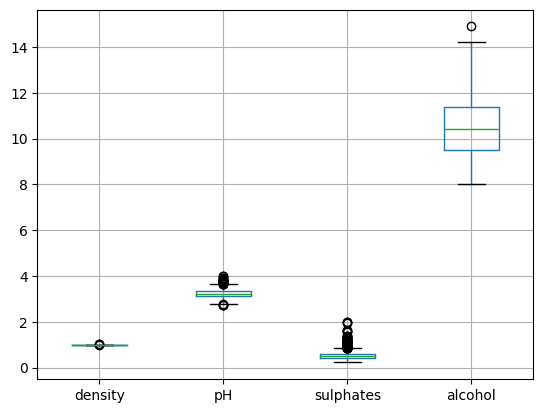

In [14]:
df.boxplot(['density', 'pH', 'sulphates', 'alcohol'])
plt.show()

## Outliers Handling

In [15]:
def impute(sample, upper, lower):
    if sample > upper:
        return upper
    elif sample < lower:
        return lower
    else:
        return sample

In [16]:
def handle_normal_features(feature: str):
    upper = df[feature].mean() + 3 * df[feature].std()
    lower = df[feature].mean() - 3 * df[feature].std()
    df[feature] = df[feature].apply(lambda x: impute(x, upper, lower))

In [17]:
def handle_skewed_features(feature: str):
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    upper = df[feature].quantile(0.75) + 1.5 * IQR
    lower = df[feature].quantile(0.25) - 1.5 * IQR
    df[feature] = df[feature].apply(lambda y: impute(y, upper, lower))

In [18]:
def handle_other_features(feature: str):
    upper = df[feature].quantile(0.99)
    lower = df[feature].quantile(0.01)
    df[feature] = df[feature].apply(lambda z: impute(z, upper, lower))

In [19]:
from scipy import stats
from statsmodels import api as sm

In [20]:
skewness = {col: stats.skew(df[col]) for col in df.columns}
skewed_features = [a for a in skewness if skewness[a] > 1]

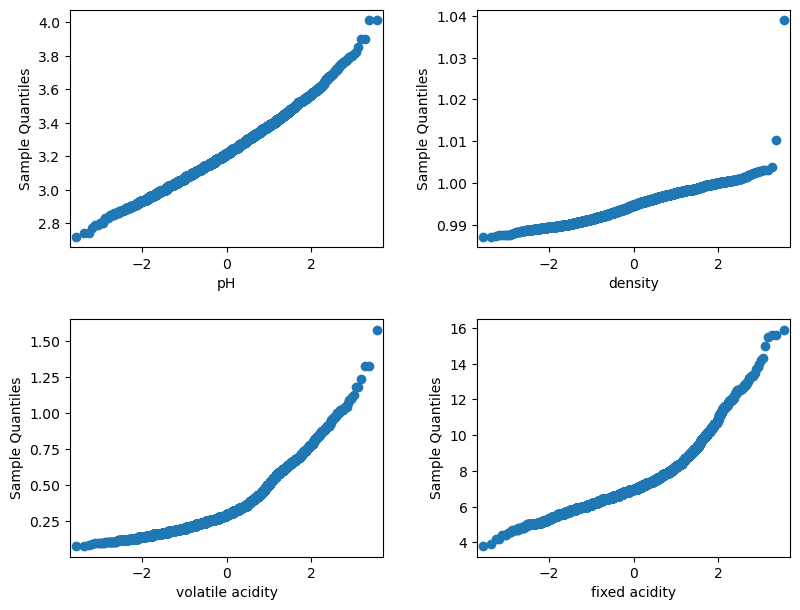

In [21]:
fig, ax = plt.subplots(2, 2)
plt.subplots_adjust(right=1.25, hspace=0.3, wspace=0.3, top=1.25)

sm.qqplot(df['pH'], ax=ax[0, 0])
ax[0, 0].set(xlabel="pH")

sm.qqplot(df['density'], ax=ax[0, 1])
ax[0, 1].set(xlabel="density")

sm.qqplot(df['volatile acidity'], ax=ax[1, 0])
ax[1, 0].set(xlabel="volatile acidity")

sm.qqplot(df['fixed acidity'], ax=ax[1, 1])
ax[1, 1].set(xlabel="fixed acidity");

In [22]:
normal_features = ['pH', 'density', 'volatile acidity', 'fixed acidity']
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
            'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [23]:
for x in features:
    if x in normal_features:
        handle_normal_features(feature=x)
    elif x in skewed_features:
        handle_skewed_features(feature=x)
    else:
        handle_other_features(feature=x)

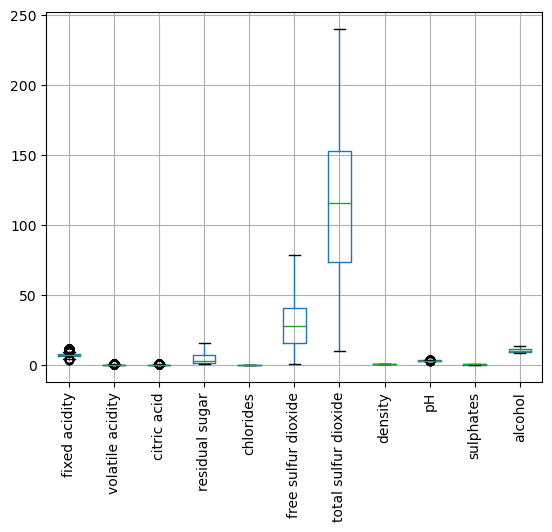

In [24]:
df.boxplot(features)
plt.xticks(rotation=90);

## Correlation

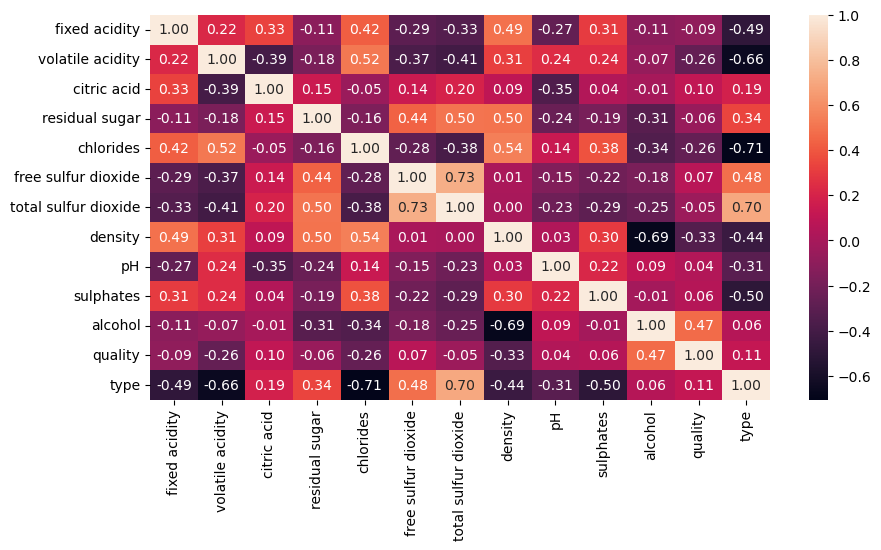

In [25]:
plt.figure(figsize=(10, 5))
sns.heatmap(data=df.corr(), annot=True, fmt='.02f')
plt.show()

In [26]:
# Dropping Correlated Features!
df.drop("free sulfur dioxide", axis=1, inplace=True)

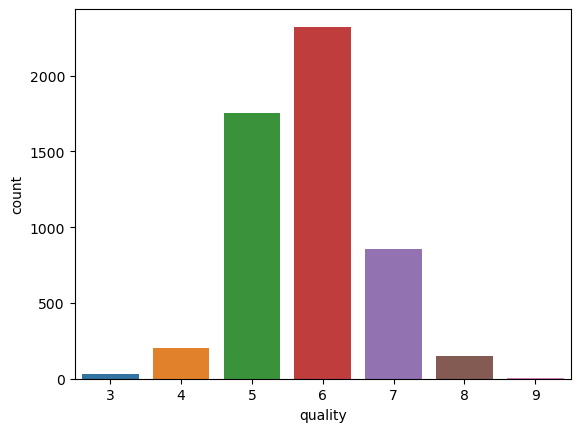

In [27]:
sns.countplot(x=df['quality'])
plt.show()

## Target
According to description of our dataset `target` variable is **quality**. But it contains values between 0 and 10.

In [28]:
def quality(sample):
    # Bad Quality
    if sample == 3 or sample == 4:
        return 0
    # Good Quality!
    elif sample == 5 or sample == 6:
        return 1
    # Best Quality!
    else:
        return 2

df['quality'] = df['quality'].apply(lambda z: quality(sample=z))

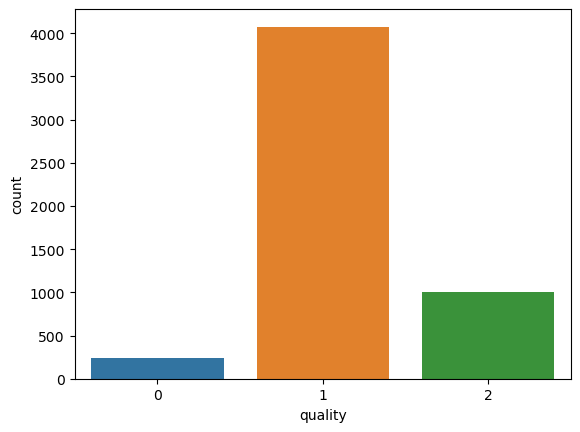

In [29]:
sns.countplot(x=df['quality'])
plt.show()

In [30]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [31]:
from imblearn.over_sampling import SMOTE

sampler = SMOTE(random_state=100)
X, y = sampler.fit_resample(X, y)

## Normalization

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2, random_state=100)

## 2. K Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_X, train_Y)

KNeighborsClassifier(n_neighbors=10)

In [34]:
knn.score(test_X, test_Y)

0.8024539877300614

In [35]:
knn.score(train_X, train_Y)

0.8257668711656442

## 3. Support Vector Machines

In [36]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(train_X, train_Y)

SVC()

In [37]:
svm.score(test_X, test_Y)

0.7501022494887526

In [38]:
svm.score(train_X, train_Y)

0.741717791411043

## Neural Network

In [39]:
import keras

In [40]:
def build_model(inputs, outputs):
    input_logits = keras.Input(shape=(inputs, ))
    hidden_logits = keras.layers.Dense(units=128, activation="relu")(input_logits)
    hidden_logits = keras.layers.Dense(units=64, activation="relu")(hidden_logits)
    dropout = keras.layers.Dropout(rate=0.25)(hidden_logits)
    output_logits = keras.layers.Dense(units=outputs, activation="softmax")(dropout)

    model = keras.Model(inputs=input_logits, outputs=output_logits)
    model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
    return model

In [41]:
model = build_model(inputs=11, outputs=3)

In [42]:
early_callback = keras.callbacks.EarlyStopping(patience=5)
model.fit(train_X, train_Y, epochs=100, validation_data=(test_X, test_Y), batch_size=64, callbacks=early_callback)

Epoch 1/100
153/153 [==============================] - 1s 2ms/step - loss: 0.9262 - accuracy: 0.5453 - val_loss: 0.7917 - val_accuracy: 0.6348
Epoch 2/100
153/153 [==============================] - 0s 2ms/step - loss: 0.7977 - accuracy: 0.6256 - val_loss: 0.7703 - val_accuracy: 0.6487
Epoch 3/100
153/153 [==============================] - 0s 2ms/step - loss: 0.7690 - accuracy: 0.6449 - val_loss: 0.7227 - val_accuracy: 0.6810
Epoch 4/100
153/153 [==============================] - 0s 2ms/step - loss: 0.7519 - accuracy: 0.6537 - val_loss: 0.7240 - val_accuracy: 0.6753
Epoch 5/100
153/153 [==============================] - 0s 2ms/step - loss: 0.7364 - accuracy: 0.6646 - val_loss: 0.7017 - val_accuracy: 0.6883
Epoch 6/100
153/153 [==============================] - 0s 2ms/step - loss: 0.7243 - accuracy: 0.6767 - val_loss: 0.6917 - val_accuracy: 0.6924
Epoch 7/100
153/153 [==============================] - 0s 2ms/step - loss: 0.7148 - accuracy: 0.6805 - val_loss: 0.6822 - val_accuracy: 0.7018

## Metrics

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

# KNN PREDICTIONS!
preds_one = knn.predict(test_X)

# SVC PREDICTIONS!
preds_two = svm.predict(test_X)

# NN PREDICTIONS!
preds_three = model.predict(test_X).argmax(axis=1)

77/77 [==============================] - 0s 1ms/step


In [44]:
report1 = classification_report(test_Y, preds_one)
print(report1)

              precision    recall  f1-score   support

           0       0.80      0.97      0.87       817
           1       0.86      0.54      0.66       799
           2       0.78      0.90      0.83       829

    accuracy                           0.80      2445
   macro avg       0.81      0.80      0.79      2445
weighted avg       0.81      0.80      0.79      2445



In [45]:
report2 = classification_report(test_Y, preds_two)
print(report2)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       817
           1       0.68      0.56      0.61       799
           2       0.75      0.88      0.81       829

    accuracy                           0.75      2445
   macro avg       0.75      0.75      0.74      2445
weighted avg       0.75      0.75      0.74      2445



In [46]:
report3 = classification_report(test_Y, preds_three)
print(report3)

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       817
           1       0.74      0.68      0.71       799
           2       0.80      0.85      0.82       829

    accuracy                           0.81      2445
   macro avg       0.81      0.81      0.81      2445
weighted avg       0.81      0.81      0.81      2445



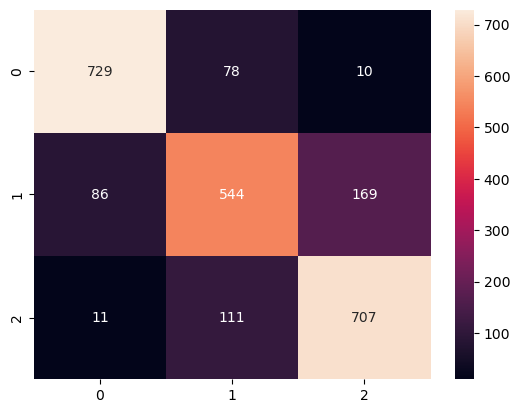

In [48]:
cm = confusion_matrix(test_Y, preds_three)
sns.heatmap(data=cm, annot=True, fmt='.0f')
plt.show()

In [49]:
model.save("wine-quality.keras")

In [50]:
test_X.shape

(2445, 11)